# Grupo 4 - Laboratorio 3 - R

Katiuska Olivera Quevedo (20172533) <br/> 
Rosemery Fernandez Sanchez (20172635) <br/> 
Aliro Cabrera Florez (20152034) <br/> 
Jose Uscamayta Quispe (20195674) <br/>


## $Multicollinearity$


### 1. Vectors (columns) follow a normal distribution.


In [1]:
#1era Parte
set.seed(1)

v1 <- rnorm(10)
v2 <- rnorm(10)
v3 <- rnorm(10)
v4 <- rnorm(10)
v5 <- rnorm(10)
v6 <- rnorm(10)
v7 <- rnorm(10)
v8 <- rnorm(10)
v9 <- rnorm(10)

a <-3
b <-7

v10 <- a*v1 + b*v2 + v3

matriz <- cbind(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10)
head(matriz)
save( matriz, file = "../data/matriz.RData")

matriz.i<-solve(matriz)
matriz.i



v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
-0.6264538,1.51178117,0.91897737,1.35867955,-0.1645236,0.3981059,2.40161776,0.4755095,-0.5686687,9.622084
0.1836433,0.38984324,0.78213630,-0.10278773,-0.2533617,-0.6120264,-0.03924000,-0.7099464,-0.1351786,4.061969
-0.8356286,-0.62124058,0.07456498,0.38767161,0.6969634,0.3411197,0.68973936,0.6107264,1.1780870,-6.781005
1.5952808,-2.21469989,-1.98935170,-0.05380504,0.5566632,-1.1293631,0.02800216,-0.9340976,-1.5235668,-12.706408
0.3295078,1.12493092,0.61982575,-1.37705956,-0.6887557,1.4330237,-0.74327321,-1.2536334,0.5939462,9.482865
-0.8204684,-0.04493361,-0.05612874,-0.41499456,-0.7074952,1.9803999,0.18879230,0.2914462,0.3329504,-2.832069


ERROR: Error in solve.default(matriz): sistema es computacionalmente singular: número de condición recíproco = 4.1951e-18


In the case of Python, the program gives an output, however, it is seen that for R the program gives an error as a response.
This is because in R, the last vector of the matrix is a linear combination of the previous ones. This is a problem of perfect multicollinearity, because of this we have a non-singular matrix whose determinants are 0 and therefore a result cannot be obtained. In both programs multicollinearity is presented, but both have different packages, it could be said that R has an econometric cut base and Python, a statistical one.

## $Analyzing\;rct\;data\;with\;precision\;adjustment$


## Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

In [2]:
## loading the data
Penn <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

It can be seen, the group of treatment is the number 2.

In [3]:
T2<- (tg==2)
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [4]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


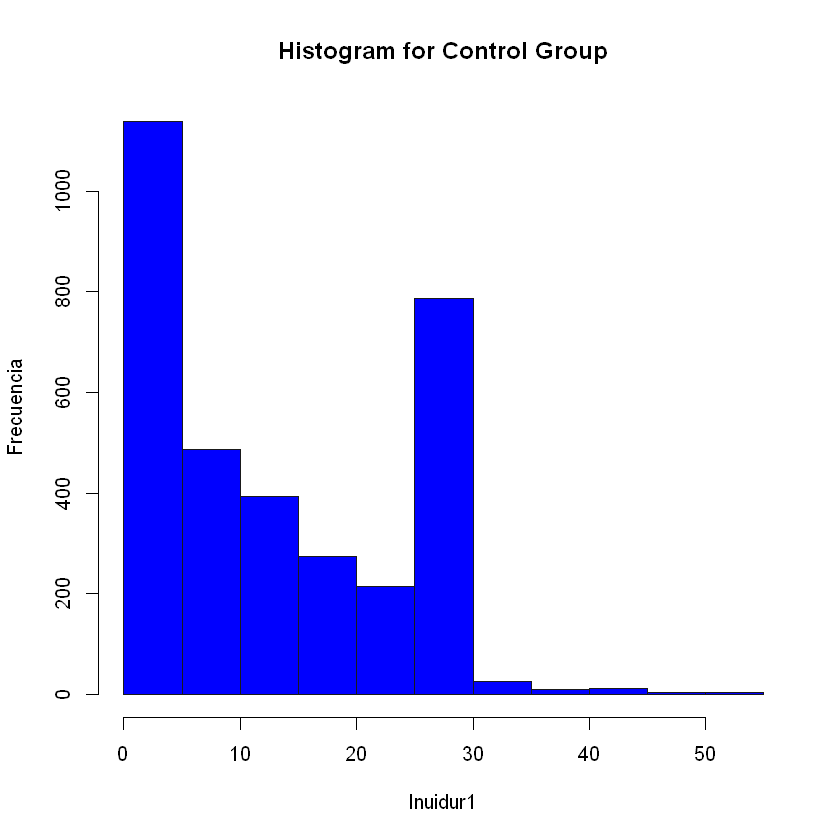

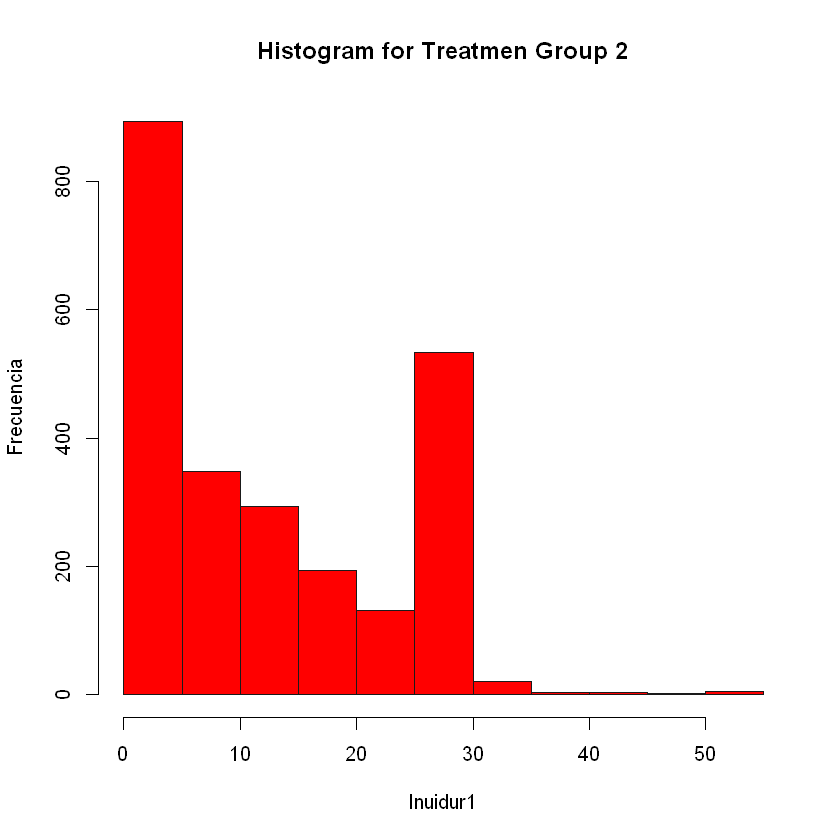

In [5]:
#Histogramas 

Penn1 <- subset(Penn,tg==0) 
Penn2 <- subset(Penn,tg==2) 

hist(Penn1$inuidur1,
     breaks = 10,
     # breaks = seq(-50, -350, -50),
     col = "blue",
     border = "gray10",
     main = "Histogram for Control Group",
     xlab = 'Inuidur1',
     ylab = 'Frecuencia')

hist(Penn2$inuidur1,
     breaks = 10,
     # breaks = seq(-50, -350, -50),
     col = "red",
     border = "gray10",
     main = "Histogram for Treatmen Group 2",
     xlab = 'Inuidur1',
     ylab = 'Frecuencia')



### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [6]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

install.packages("lmtest")
library(lmtest)
library(sandwich)
coeftest(m, vcov = vcovHC(m, type="HC1"))

package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Anaconda-Python\envs\new\Lib\R\library\00LOCK\lmtest\libs\x64\lmtest.dll  a C:\Anaconda-Python\envs\new\Lib\R\library\lmtest\libs\x64\lmtest.dll: Permission denied"Warning message:
"restored 'lmtest'"


The downloaded binary packages are in
	C:\Users\Usuario\AppData\Local\Temp\Rtmp2NfE0g\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [7]:
# get same dataframe
X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/m_reg.RData")

### Generating similar qr decomposition

#### Replicate how lm drop variables [as discussed here](https://stackoverflow.com/questions/35410769/remove-perfectly-multicollinear-variables-from-data-frame)

We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification

In [8]:
# model specifications


# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2

# adding controls
formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
# Omitted dummies: q1, nondurable, muld


ols.cl_reg <- lm(formula_cl)
ols.cra_reg <- lm(formula_cra)


ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))

print(ols.cl)
print(ols.cra)




t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5 

In [9]:
# get same dataframe for ols.cl
X <- as.data.frame( model.matrix(ols.cl_reg) )

no_col <- attributes(ols.cl_reg$coefficients)$names[is.na(ols.cl_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/ols_cl_reg.RData")

# get same dataframe for ols.cra
X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = "../data/ols_cra_reg.RData")


The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [10]:

#interactive regression model; (IRA)

X = model.matrix (~ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1]
dim(X)
demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
#print(ols.ira)


ols.ira 


[1] 5782  119


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [11]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

save( S1, file = "../data/ols_ira_reg.RData")




In [12]:
sum(S)

[1] 8261.683

package 'coefplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Usuario\AppData\Local\Temp\Rtmp2NfE0g\downloaded_packages


Warning message:
"package 'coefplot' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


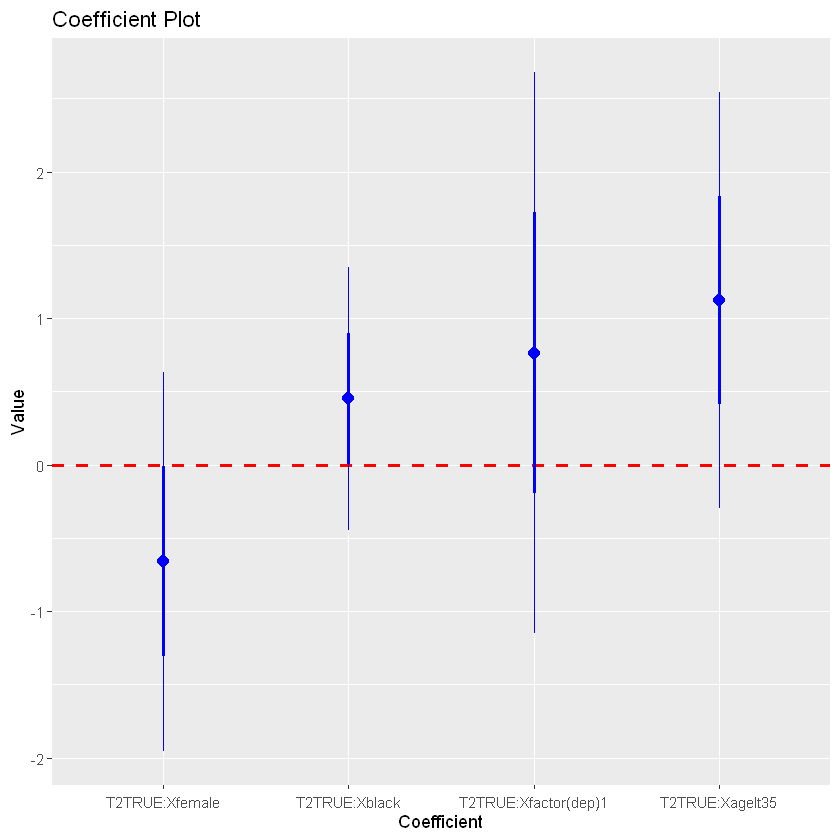

In [13]:
#Plotear

install.packages("coefplot")
library(coefplot)

coefplot(ols.ira_reg, coefficients= c('T2TRUE:Xfemale','T2TRUE:Xblack','T2TRUE:Xagelt35','T2TRUE:Xfactor(dep)1'), horizontal=1, zeroColor="red")



The variable female has a negative relation on length of unemployment, about the other could point a positive relation.
Statistically no significance is found at the 5% by default. This suggests that there are no effects for female treated patients, black test treated persons and a 35-year-old person with a dependent.

Next we try out partialling out with lasso

In [14]:
install.packages("hdm")
library(hdm)

T2 = demean(T2)

DX = model.matrix(~T2*X)[,-1]

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))


print(rlasso.ira)



package 'hdm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Usuario\AppData\Local\Temp\Rtmp2NfE0g\downloaded_packages


Warning message:
"package 'hdm' was built under R version 3.6.3"

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [15]:
# getting data
S = as.data.frame(DX)
save( S, file = "../data/rlasso_ira_reg.RData")

### Results

In [16]:
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

,CL,CRA,IRA,IRA w Lasso
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Fri Sep 24 17:37:06 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}
